<a href="https://colab.research.google.com/github/putrimelanitalb/Plant-Diseases-Identification-Using-SVM/blob/main/Jupyter%20Notebook/final_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Identifikasi Penyakit Daun Tanaman Anggur Menggunakan Metode _Support Vector Machine_**

Kelompok 5 - Paralel 1    
  
1. Tia Isnawati Noor (G64180034)
2. Elina Eprida (G64180038)
3. Ulfainil Aisyah (G64180045)
4. Hana Salsabila (G64180051)
5. Putri Melanita Londong Bua (G64180053)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***IMPORT LIBRARY***

In [2]:
import os
import cv2
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab.patches import cv2_imshow

In [3]:
# Konversi warna citra dari RGB ke HSV
def rgb2hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV)
    return hsv_img

# Segmentasi citra untuk ekstraksi warna hijau dan coklat
def segmentation(rgb_img, hsv_img):
    # Thresholding untuk warna hijau
    lower_green = np.array([25,50,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    
    # Thresholding untuk warna coklat
    lower_brown = np.array([100,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    
    # Masking menggunakan healthy_mask dan disease_mask 
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)

    return final_result

***LOAD FILE CITRA***

In [4]:
# Set working directory
train_path = '/content/drive/MyDrive/SEMESTER 6/PCD/Kelompok 5 PCD/grape_datasets/train'
# Label train dari setiap nama folder
train_label = os.listdir(train_path)
train_label.sort()

data = []
for label_name in train_label:
    # Path ke setiap folder label train
    img_path = os.path.join(train_path, label_name)
    # Simpan index label untuk data
    label_idx = train_label.index(label_name)
    
    print('[STATUS] Baca file pada folder "{}"'.format(label_name))
    for img in tqdm(os.listdir(img_path)):
        # Path ke masing-masing gambar
        img_file = os.path.join(img_path, img)
        # Read data citra
        leaf_img = cv2.imread(img_file)
        
        # Resize citra menjadi ukuran 50x50
        leaf_img = cv2.resize(leaf_img, (50,50))
        # Praproses citra
        hsv_img = rgb2hsv(leaf_img)
        segment_img = segmentation(leaf_img, hsv_img)
        # Split channel citra
        a,b,c = cv2.split(segment_img)
        # cv2_imshow(a); cv2_imshow(b); cv2_imshow(c)
        
        # Ubah citra menjadi flatten array
        image = np.array(b).flatten()
        # Masukkan citra dan labelnya dalam 'data'
        data.append([image, label_idx])

[STATUS] Baca file pada folder "black_rot"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app



[STATUS] Baca file pada folder "esca"



[STATUS] Baca file pada folder "healthy"



[STATUS] Baca file pada folder "leaf_blight"


***SPLIT DATA TRAIN DAN DATA TEST***

In [47]:
# Acak urutan data
random.shuffle(data)

# Buat list kosong untuk menyimpan feature dan label
features = []
labels  = []

# Split feature dan label dari data
for feature, label in data:
    features.append(feature)
    labels.append(label)

# Split data menjadi 80% data train dan 20% data test
trainData,testData,trainLabel,testLabel = train_test_split(features, labels, test_size = 0.2)
print('Data Train : {} data'.format(np.shape(trainData)))
print('Data Test  : {} data'.format(np.shape(testData)))

Data Train : (5777, 2500) data
Data Test  : (1445, 2500) data


***PEMBUATAN MODEL SVM***


[STATUS] Training data train selesai

[STATUS] Prediksi data test selesai

Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       367
           1       0.76      0.85      0.80       409
           2       0.92      0.92      0.92       333
           3       0.89      0.79      0.84       336

    accuracy                           0.81      1445
   macro avg       0.82      0.81      0.82      1445
weighted avg       0.82      0.81      0.81      1445


Accuracy : 0.8117647058823529

Confusion Matrix :


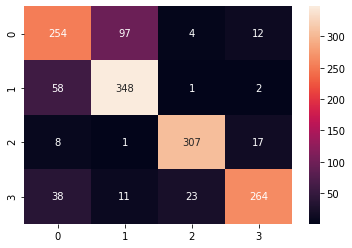

In [68]:
# Training data train menggunakan model SVM
model = SVC(kernel='poly', C=1, degree=5, coef0=0).fit(trainData, trainLabel)
print('\n[STATUS] Training data train selesai')

# Prediksi data test
testPredict = model.predict(testData)
print('\n[STATUS] Prediksi data test selesai')

# Classification report
print('\nClassification Report :')
print(classification_report(testLabel, testPredict))

# Tingkat akurasi
print('\nAccuracy :', accuracy_score(testLabel, testPredict))

# Confusion matrix
print('\nConfusion Matrix :')
cm = confusion_matrix(testLabel, testPredict)
sns.heatmap(cm, annot=True, fmt='d')

***MENAMPILKAN HASIL PREDIKSI***

Prediction : Healthy


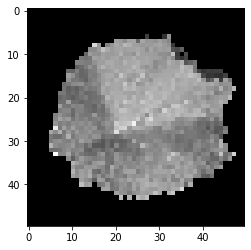

In [93]:
idx = 0

# Prediksi nama label
if testPredict[idx] == 0:
    print('Prediction : Black Rot')
elif testPredict[idx] == 1:
    print('Prediction : Esca (Black Measles)')
elif testPredict[idx] == 2:
    print('Prediction : Healthy')
elif testPredict[idx] == 3:
    print('Prediction : Leaf Blight (Isariopsis Leaf Spot)')

# Tampilkan citra
leaf = testData[idx].reshape(50,50)
plt.imshow(leaf, cmap = 'gray')
plt.show()